In [1]:
import pandas as pd #引入pandas 套件
import requests #引入爬蟲用套件
import matplotlib.pyplot as plt #引入繪圖用套件
#import geopandas #引入擴展DS用的套件←不能用，可能是Jupyter不支援等等問題
import plotly.express as px #上一行的替代方案，繪圖擴展
#使用數據集「美國各州大學平均學費」(Average cost of undergraduate student by state USA)
USU= pd.read_csv("nces330_20.csv" ,encoding="ASCII" )

In [2]:
#最新一年四年制大學平均學費
mask = (USU['Year'] == 2021) & (USU['Length'] == '4-year')
filtered_df = USU.loc[mask]
mean_value = filtered_df['Value'].mean()
print('2021美國一學期大學學費為：',mean_value,'USD')

2021美國一學期大學學費為： 18323.97609561753 USD


In [3]:
#將這些數據即時換算成台幣呢？
url = 'https://rate.bot.com.tw/xrt/flcsv/0/day'   # 牌告匯率 CSV 網址
rate = requests.get(url)   # 爬取網址內容
rate.encoding = 'utf-8'    # 調整回應訊息編碼為 utf-8，避免編碼不同造成亂碼
rt = rate.text             # 以文字模式讀取內容
rts = rt.split('\n')
rts[1]
a = rts[1].split(',')
usd_to_twd_rate = a[12]
mean_value_twd=mean_value*float(usd_to_twd_rate)
print('2021美國一學期大學學費為：',mean_value_twd,'NTD')

2021美國一學期大學學費為： 570333.7559760957 NTD


In [4]:
#比較美國公立大學與私立大學學費差異
mask1 = (USU['Type'] == 'Private') & (USU['Length'] == '4-year')
Private_fee = USU.loc[mask1]
mean_Private_fee = Private_fee['Value'].mean()
print('美國一學期私立大學學費為：',mean_Private_fee,'USD')
mask2 = (USU['Type'] == 'Public In-State') | (USU['Type'] == 'Public Out-State') & (USU['Length'] == '4-year')
Other_fee = USU.loc[mask2]
mean_Other_fee = Other_fee['Value'].mean()
print('美國一學期公立大學學費為：',mean_Other_fee,'USD')
print('美國一學期私立大學學費為：',mean_Private_fee*float(usd_to_twd_rate),'NTD')
print('美國一學期公立大學學費為：',mean_Other_fee*float(usd_to_twd_rate),'NTD')

美國一學期私立大學學費為： 18810.480662983424 USD
美國一學期公立大學學費為： 7676.8001543209875 USD
美國一學期私立大學學費為： 585476.210635359 NTD
美國一學期公立大學學費為： 238940.40480324073 NTD


In [5]:
#2021年不同州的公立大學學費
# 按州分组，并计算每个州的学费平均值和中位数
mean_by_state = Other_fee.groupby('State')['Value'].mean()
median_by_state = Other_fee.groupby('State')['Value'].median()
# 将平均值和中位数从大到小排序
mean_sorted = mean_by_state.sort_values(ascending=False)
median_sorted = median_by_state.sort_values(ascending=False)

# 输出结果
print('2021年不同州的大学学费平均值：')
print(mean_sorted)
print('\n2021年不同州的大学学费中位数：')
print(median_sorted)

2021年不同州的大学学费平均值：
State
New Hampshire           11164.884615
Vermont                 10797.038462
New Jersey              10009.000000
Delaware                10005.285714
Pennsylvania             9717.192308
Massachusetts            9620.230769
Connecticut              9324.769231
Illinois                 9203.615385
Rhode Island             9161.038462
New York                 8935.307692
Virginia                 8915.923077
Oregon                   8475.538462
South Carolina           8438.423077
Minnesota                8293.000000
Michigan                 8283.000000
Ohio                     8282.230769
Maryland                 8121.461538
Colorado                 7987.846154
Alaska                   7818.681818
Arizona                  7786.538462
California               7779.461538
Washington               7755.576923
Kentucky                 7707.576923
Alabama                  7682.500000
Indiana                  7662.807692
Hawaii                   7637.461538
Maine         

In [6]:
#2021年不同州的私立大學學費
# 按州分组，并计算每个州的学费平均值和中位数
mean_by_state = Private_fee.groupby('State')['Value'].mean()
median_by_state = Private_fee.groupby('State')['Value'].median()
# 将平均值和中位数从大到小排序
mean_sorted = mean_by_state.sort_values(ascending=False)
median_sorted = median_by_state.sort_values(ascending=False)

# 输出结果
print('2021年不同州的大学学费平均值：')
print(mean_sorted)
print('\n2021年不同州的大学学费中位数：')
print(median_sorted)

2021年不同州的大学学费平均值：
State
Massachusetts           28788.888889
District of Columbia    27723.166667
Vermont                 27107.944444
Connecticut             26678.888889
Rhode Island            26593.500000
Maryland                26503.055556
New York                26005.888889
Pennsylvania            25787.111111
Oregon                  24428.666667
Maine                   24296.055556
New Jersey              24123.111111
Louisiana               23555.000000
Washington              23524.000000
California              22753.500000
New Hampshire           21826.388889
Illinois                21704.111111
North Carolina          21317.611111
Indiana                 21122.166667
Texas                   21029.888889
Wisconsin               20588.777778
Ohio                    20573.555556
Minnesota               20376.388889
Georgia                 19382.500000
Tennessee               17986.611111
Nevada                  17868.222222
Florida                 17841.222222
Iowa          

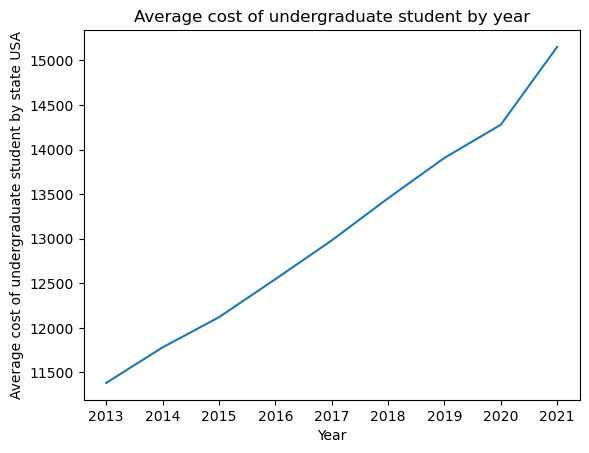

In [7]:
#從2013~2021的八年間，美國的大學學費是否有漲跌？
data = USU[['Year', 'Value']]
data = data.groupby('Year').mean()
# 绘制折线图
plt.plot(data.index, data['Value'])
plt.xlabel('Year')
plt.ylabel('Average cost of undergraduate student by state USA')
plt.title('Average cost of undergraduate student by year')
plt.show()

In [9]:
#我想知道，在美國哪個區域讀大學最貴，反之亦然？
data_2021 = USU[USU['Year'] == 2021]
# 将州名全称替换为缩写
state_abbr = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
              'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
              'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
              'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
              'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
              'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
              'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
              'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
              'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
              'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'}

USU['State'] = USU['State'].replace(state_abbr)

# 按州分组计算平均值
data_by_state = data_2021.groupby('State')['Value'].mean().reset_index()
print(data_by_state)
fig = px.choropleth(data_by_state,
              locations='State',
              locationmode='USA-states',
              color='Value',
              scope='usa',
              title='Average Cost of Undergraduate Student by State in 2021',
              labels={'Value': 'Average Cost'})
fig.update_layout(geo=dict(bgcolor='white', lakecolor='lightblue',
                            landcolor='white', showcountries=True))
fig.show()

   State         Value
0     AK  16113.800000
1     AL  12979.142857
2     AR  11875.571429
3     AZ  11988.428571
4     CA  18440.285714
5     CO  15171.857143
6     CT  20209.857143
7     DC  24972.000000
8     DE  16917.600000
9     FL  13398.285714
10    GA  14447.571429
11    HI  14317.857143
12    IA  15164.714286
13    ID   9931.285714
14    IL  16733.571429
15    IN  16082.428571
16    KS  12537.428571
17    KY  14826.714286
18    LA  15803.714286
19    MA  20395.285714
20    MD  17922.857143
21    ME  16317.000000
22    MI  16400.285714
23    MN  14570.571429
24    MO  13043.571429
25    MS  11270.285714
26    MT  14453.000000
27    NC  15007.571429
28    ND   9646.857143
29    NE  12225.428571
30    NH  15395.571429
31    NJ  17497.142857
32    NM  12265.000000
33    NV  17302.600000
34    NY  17802.285714
35    OH  15953.571429
36    OK  13358.857143
37    OR  18921.714286
38    PA  17902.714286
39    RI  19713.000000
40    SC  15319.285714
41    SD  11290.714286
42    TN  1